## Creating and plotting Taylor models in one variable

In [1]:
using Revise, TaylorModels, Plots, TaylorSeries, IntervalArithmetic
using TaylorSeries: gradient, jacobian

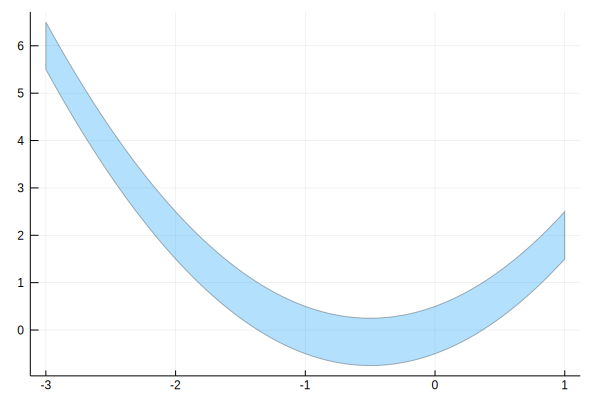

In [56]:
m = 4
p = Taylor1([0.0, 1.0, 1.0], m)
δ = 0.5; I = Interval(-δ, δ)
x₀ = Interval(0.0)
D = Interval(-3.0, 1.0)
TM = TaylorModel1(p, I, x₀, D)

plot(TM, label="")

In [3]:
TM.pol # the polynomial field

 1.0 t + 1.0 t² + 𝒪(t⁵)

In [4]:
TM.dom # the domain

[-3, 1]

In [5]:
TM.rem # the interval remainder

[-0.5, 0.5]

If we enlarge the interval remainder, the TM covers a larger region:

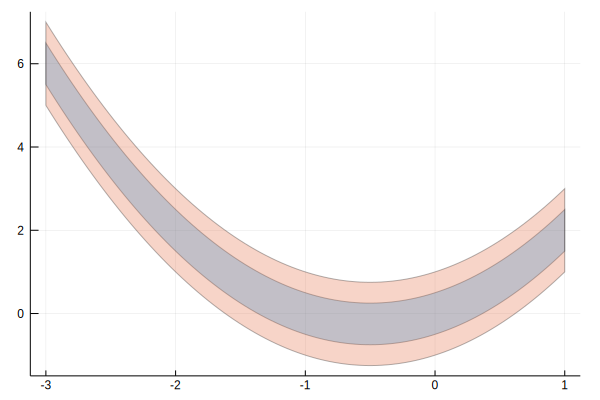

In [6]:
δ = 1.0; I = Interval(-δ, δ)
plot!(TaylorModel1(p, I, x₀, D), label="")

## Taylor model in one variable of order three

In [57]:
m = 4
p = Taylor1([0.0, 1.0, 1.0, 1.0], m)

 1.0 t + 1.0 t² + 1.0 t³ + 𝒪(t⁵)

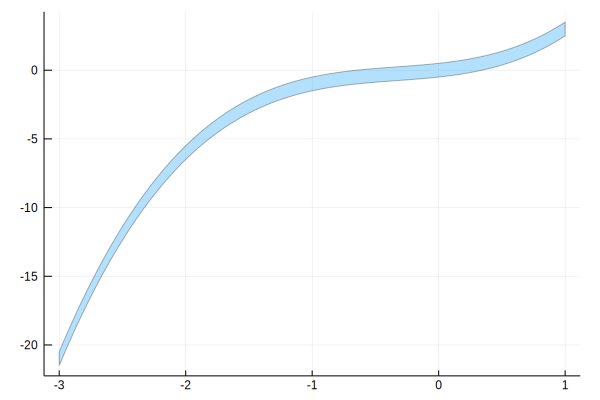

In [58]:
δ = 0.5; I = Interval(-δ, δ)
x₀ = Interval(0.0)
D = Interval(-3.0, 1.0)
TM = TaylorModel1(p, I, x₀, D)

plot(TM, label="")

## Taylor model in two variables of order two

In [60]:
m = 4
x₁, x₂ = set_variables(Float64, ["x₁", "x₂"], order=2*m)

p = 1 + x₁^2 - x₂
x₀ = Interval(0.0, 0.0) × Interval(0.0, 0.0)
Dx₁ = Interval(0.0, 3.0)
Dx₂ = Interval(-1.0, 1.0)
D = Dx₁ × Dx₂

δ = 0.5; I = Interval(-δ, δ)
TM = TaylorModelN(p, I, x₀, D)

 1.0 - 1.0 x₂ + 1.0 x₁² + [-0.5, 0.5]

## Taylor models in three variables

In [7]:
m = 4
x₁, x₂, x₃ = set_variables(Float64, ["x₁", "x₂", "x₃"], order=2*m)

3-element Array{TaylorN{Float64},1}:
  1.0 x₁ + 𝒪(‖x‖⁹)
  1.0 x₂ + 𝒪(‖x‖⁹)
  1.0 x₃ + 𝒪(‖x‖⁹)

In [8]:
p = (1 + x₁ - x₂, x₃ - x₁)

( 1.0 + 1.0 x₁ - 1.0 x₂ + 𝒪(‖x‖⁹),  - 1.0 x₁ + 1.0 x₃ + 𝒪(‖x‖⁹))

In [9]:
x₀ = Interval(2.0, 2.0) × Interval(0.0, 0.0) × Interval(0.0, 0.0)

Dx₁ = Interval(1.0, 3.0)
Dx₂ = Interval(-1.0, 1.0)
Dx₃ = Interval(-1.0, 0.0)
D = Dx₁ × Dx₂ × Dx₃

δ = 0.5; I = Interval(-δ, δ)

TM2 = TaylorModelN(p[2], I, x₀, D)

 - 1.0 x₁ + 1.0 x₃ + [-0.5, 0.5]

## Normalization

In [10]:
TM.pol

 1.0 t + 1.0 t² + 𝒪(t⁵)

In [11]:
q = [normalize_taylor(p[1], D, true), normalize_taylor(p[2], D, true)]

2-element Array{TaylorN{Float64},1}:
    3.0 + 1.0 x₁ - 1.0 x₂ + 𝒪(‖x‖⁹)
  - 2.5 - 1.0 x₁ + 0.5 x₃ + 𝒪(‖x‖⁹)

## Overapproximation of a first order taylor model with a zonotope

See Lemma 2.4.8 page 52 of Chen's thesis.

We consider the same example as above but in only one variable, $x_1$, so the resulting sets can be plotted.

In [12]:
using LazySets: Zonotope, vertices_list, minkowski_sum, convex_hull

In [13]:
m = 4
x₁ = Taylor1([0.0, 1.0, 0.0], m)

p = 1 + x₁

x₀ = Interval(0.0, 0.0)

Dx₁ = Interval(-1.0, 3.0)
D = Dx₁

δ = 0.5; I = Interval(-δ, δ)

TM1 = TaylorModel1(p, I, x₀, D)

 1.0 + 1.0 t + [-0.5, 0.5]

Note that:

- $\min_{Dx₁} (p, I)$ is achieved at $x₁ = -1$, with value $-0.5$
- $\max_{Dx₁} (p, I)$ is achieved at $x₁ = 3$, with value $4.5$

The exact range of this TM is then the interval $R_{(p, I)} = [-0.5, 4.5]$.

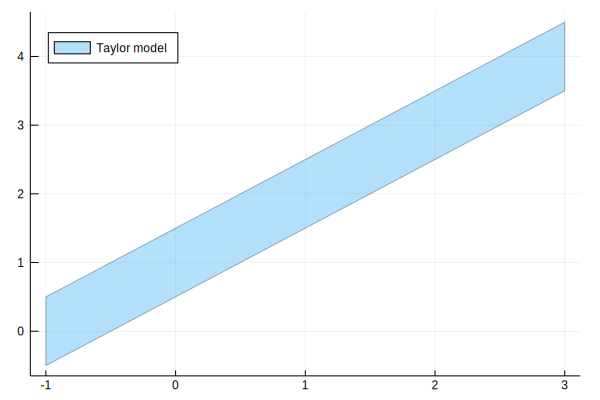

In [14]:
plot(TM1, label="Taylor model", legend=:topleft)

In [15]:
# normalize the polynomial to the symmetric interval [-1, 1]
q = normalize_taylor(TM1.pol, D, true)

 2.0 + 2.0 t + 𝒪(t⁵)

In [16]:
# box overapproximation of the range
evaluate(TM1, D)

[-0.5, 4.5]

In [17]:
# zonotopic overapproximation of the range
Zp = Zonotope([2.0], hcat([2.0]))

Zonotope{Float64}([2.0], [2.0])

In [18]:
convex_hull(vertices_list(Z))

UndefVarError: UndefVarError: Z not defined

Finall we take the minkowski sum with the interval remainder:

In [19]:
# zonotope for the interval remainder
ZI = Zonotope([0.0], hcat([δ]))

Zonotope{Float64}([0.0], [0.5])

In [20]:
vertices_list(ZI)

2-element Array{Array{Float64,1},1}:
 [0.5] 
 [-0.5]

In [21]:
Z = minkowski_sum(Zp, ZI)

Zonotope{Float64}([2.0], [2.0 0.5])

In [22]:
convex_hull(vertices_list(Z))

2-element Array{Array{Float64,1},1}:
 [-0.5]
 [4.5] 

We conclude that, in this example, *both* the box overapproximation and the zonotope enclosure are exact with respect to the range of this Taylor model. Note in particular that `TM1` in purely linear.

## Overapproximation of a taylor model in two variables with a zonotope

In [67]:
m = 4
x₁, x₂ = set_variables(Float64, ["x₁", "x₂"], order=2*m)

2-element Array{TaylorN{Float64},1}:
  1.0 x₁ + 𝒪(‖x‖⁹)
  1.0 x₂ + 𝒪(‖x‖⁹)

In [68]:
p = [1 + x₁ - x₂, - x₁]

2-element Array{TaylorN{Float64},1}:
  1.0 + 1.0 x₁ - 1.0 x₂ + 𝒪(‖x‖⁹)
               - 1.0 x₁ + 𝒪(‖x‖⁹)

In [69]:
x₀ = Interval(0.0, 0.0) × Interval(0.0, 0.0)

[0, 0] × [0, 0]

In [70]:
Dx₁ = Interval(0.0, 3.0)
Dx₂ = Interval(-1.0, 1.0)
D = Dx₁ × Dx₂

[0, 3] × [-1, 1]

In [71]:
δ = 0.5; I = Interval(-δ, δ)

[-0.5, 0.5]

In [72]:
TM2 = [TaylorModelN(p[1], I, x₀, D), TaylorModelN(p[2], I, x₀, D)]

2-element Array{TaylorModelN{2,Float64,Float64},1}:
  1.0 + 1.0 x₁ - 1.0 x₂ + [-0.5, 0.5]
               - 1.0 x₁ + [-0.5, 0.5]

In [73]:
using Distributions

In [74]:
U1 = Uniform(Dx₁.lo, Dx₁.hi)
U2 = Uniform(Dx₂.lo, Dx₂.hi)

Uniform{Float64}(a=-1.0, b=1.0)

In [75]:
TM2_range = Vector{Tuple{Float64,Float64}}()

M = 500
for i in 1:M
    u1, u2 = rand(U1), rand(U2)
    y₁ = evaluate(p[1], (u1, u2))
    y₂ = evaluate(p[2], (u1, u2))
    push!(TM2_range, (y₁, y₂))
end

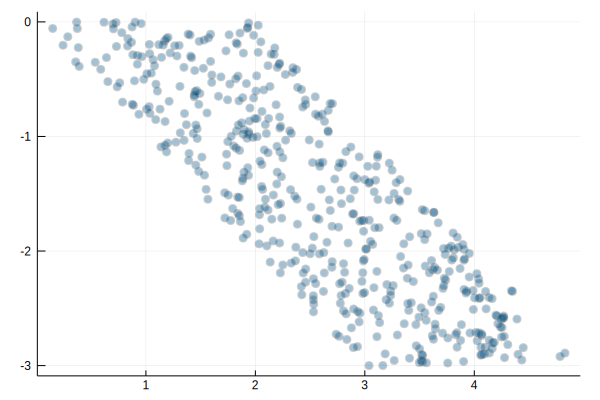

In [76]:
plot(TM2_range, label="", seriestype=:scatter, alpha=.2)

Now we add the interval remainder.



In [77]:
using LazySets

In [78]:
# convert to singleton and take the minkowski sum with the boxes

I2 = convert(Hyperrectangle, Interval(I) × Interval(I))

TM2_range_I = [Singleton([x[1], x[2]]) ⊕ I2 for x in TM2_range];

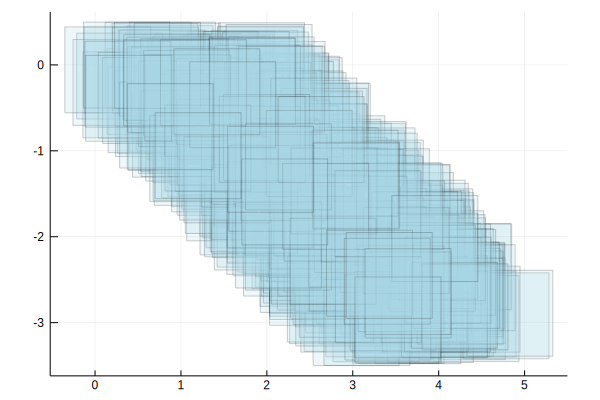

In [79]:
plot(TM2_range_I, alpha=.2, color=:lightblue)